In [1]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import string

# Load the CSV file
df = pd.read_csv("sectionized_data.csv")
df = df.dropna()

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = simple_preprocess(text, deacc=True)  # Tokenize and remove accents
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return tokens

# Tokenize and preprocess the text
df['Body'] = df['Body'].astype(str)
df['tokens'] = df['Body'].apply(preprocess)

# Create a dictionary representation of the documents
dictionary = Dictionary(df['tokens'])

# Filter out words that occur less than 10 documents, or more than 50% of the documents
#dictionary.filter_extremes(no_below=10, no_above=0.5)

# Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]


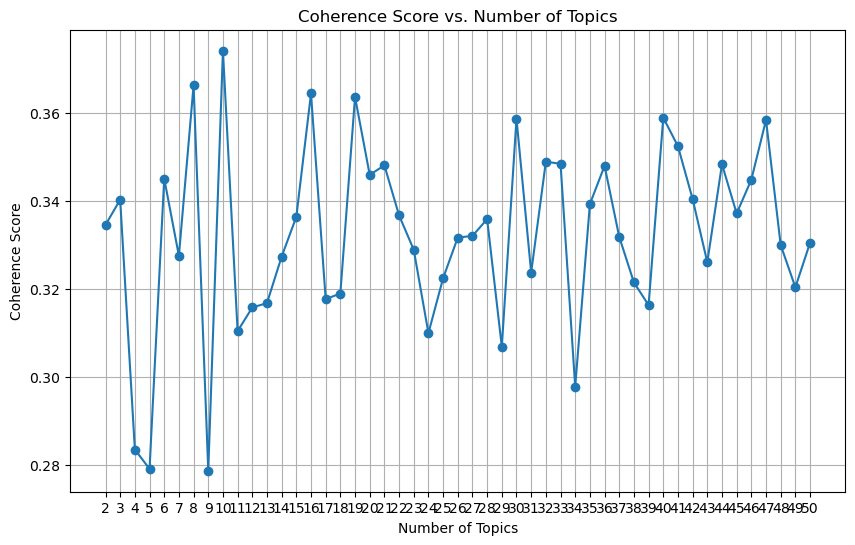

In [2]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

#Optimal K
# Define a range of candidate numbers of topics
min_topics = 2
max_topics = 100
step_size = 1
topics_range = range(min_topics, max_topics + 1, step_size)

# Initialize empty lists to store coherence scores
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in topics_range:
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    
    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Append coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(topics_range)
plt.grid(True)
plt.show()


In [6]:
# Train LDA model
num_topics = 10 # Change this number to set the number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
topics_dict = {}
Topics_Str = ''
for idx, topic in lda_model.print_topics():
    Topics_Str += "Topic {}: {}".format(idx, topic) +'\n'
    #print("Topic {}: {}".format(idx, topic)) 
print(Topics_Str)

#Use LLM model to label the topics manually (if the topics are not coherent then remove those topics)
#Label the topics during the training itself and save these topics in excel
#and when testing during demo display the dominant topic label

# Save the trained model
lda_model.save("lda_model")
dictionary.save("corpus")

Topic 0: 0.013*"court" + 0.009*"process" + 0.008*"singapore" + 0.007*"defendant" + 0.007*"judgment" + 0.006*"would" + 0.006*"claim" + 0.006*"see" + 0.005*"set" + 0.005*"enforcement"
Topic 1: 0.011*"mr" + 0.007*"would" + 0.006*"court" + 0.006*"application" + 0.005*"cheng" + 0.005*"also" + 0.005*"agreement" + 0.005*"us" + 0.004*"case" + 0.004*"appeal"
Topic 2: 0.018*"joe" + 0.017*"aiq" + 0.014*"th" + 0.012*"gss" + 0.008*"defendants" + 0.006*"audit" + 0.006*"agreement" + 0.006*"would" + 0.005*"court" + 0.005*"joes"
Topic 3: 0.010*"court" + 0.006*"plaintiffs" + 0.006*"whether" + 0.005*"would" + 0.005*"parties" + 0.005*"claimant" + 0.005*"agreement" + 0.005*"case" + 0.005*"application" + 0.005*"first"
Topic 4: 0.008*"vessel" + 0.007*"court" + 0.007*"would" + 0.007*"sentence" + 0.006*"defendant" + 0.006*"agreement" + 0.006*"appellant" + 0.005*"first" + 0.005*"also" + 0.005*"mr"
Topic 5: 0.012*"mr" + 0.009*"court" + 0.008*"defendants" + 0.007*"plaintiffs" + 0.007*"would" + 0.006*"th" + 0.005*

In [8]:
#Testing the loaded model 

from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Load the saved LDA model
lda_model = LdaModel.load("lda_model")

# Load the saved dictionary
dictionary = Dictionary.load("corpus")

# Assuming you have preprocessed text documents stored in a variable called "new_documents"
# Tokenize and preprocess the new documents
new_corpus = [dictionary.doc2bow(preprocess(doc)) for doc in df['Body']]

# Perform inference using the loaded model
for doc in new_corpus:
    topics = lda_model[doc]  # Get the topic distribution for each document
    print(topics)

[(0, 0.7901777), (2, 0.16645205)]
[(4, 0.93567383)]
[(2, 0.6818288), (7, 0.30465555)]
[(2, 0.7454035), (7, 0.1334694), (9, 0.11927015)]
[(2, 0.46629825), (5, 0.11570418), (6, 0.08409938), (7, 0.33107373)]
[(2, 0.6949915), (7, 0.2983813)]
[(6, 0.48547897), (7, 0.4529191)]
[(2, 0.9950386)]
[(2, 0.7001405), (5, 0.07947532), (7, 0.11444939), (9, 0.1018074)]
[(2, 0.6859196), (7, 0.30814984)]
[(2, 0.49205706), (7, 0.06807078), (9, 0.43644193)]
[(2, 0.942752), (7, 0.05478401)]
[(2, 0.7437349), (3, 0.057074897), (7, 0.13784513), (8, 0.059231777)]
[(2, 0.95936626), (7, 0.035524197)]
[(2, 0.8304229), (7, 0.16835384)]
[(2, 0.6312818), (7, 0.36474857)]
[(1, 0.0508151), (2, 0.69143355), (7, 0.18944548), (8, 0.034955543), (9, 0.032657437)]
[(2, 0.9980352)]
[(2, 0.4181176), (5, 0.10526753), (7, 0.38365042), (9, 0.09175094)]
[(2, 0.85608554), (7, 0.14248201)]
[(2, 0.76402175), (7, 0.2101564), (9, 0.02511842)]
[(2, 0.8073772), (7, 0.1683869), (9, 0.018225223)]
[(2, 0.24381894), (5, 0.20193517), (7, 0.5

[(1, 0.47886193), (6, 0.089728475), (7, 0.4188676)]
[(0, 0.6756234), (1, 0.17553225), (4, 0.13276598)]
[(6, 0.9914102)]
[(2, 0.8348246), (4, 0.10801053)]
[(6, 0.98081666)]
[(6, 0.5496508), (8, 0.4470735)]
[(8, 0.9885768)]
[(6, 0.03150056), (8, 0.9546874)]
[(8, 0.99130905)]
[(8, 0.9968274)]
[(6, 0.47039217), (8, 0.51779413)]
[(6, 0.45649633), (8, 0.5401375)]
[(6, 0.6710877), (8, 0.32462814)]
[(5, 0.32663226), (6, 0.67043763)]
[(0, 0.70957863), (6, 0.2812751)]
[(5, 0.18050575), (6, 0.81479234)]
[(6, 0.80595), (8, 0.19123918)]
[(6, 0.81921846), (8, 0.17881322)]
[(6, 0.9608407)]
[(0, 0.04096564), (1, 0.024878543), (6, 0.2890944), (7, 0.10961813), (8, 0.53447783)]
[(2, 0.170102), (6, 0.28682706), (7, 0.5087821), (8, 0.02947083)]
[(0, 0.27820238), (2, 0.04912623), (5, 0.112360425), (6, 0.1475729), (7, 0.20439728), (8, 0.20790619)]
[(0, 0.70138013), (2, 0.18815057), (6, 0.036179673), (8, 0.07022623)]
[(6, 0.4897351), (8, 0.5069841)]
[(6, 0.55760944), (8, 0.43855837)]
[(6, 0.44955042), (8, 0.1

[(0, 0.8402029), (3, 0.13665837)]
[(2, 0.5806699), (3, 0.36190295)]
[(3, 0.5220323), (6, 0.23526874), (8, 0.22670116)]
[(2, 0.22193907), (4, 0.052638892), (5, 0.5896627), (6, 0.027098272), (8, 0.10301374)]
[(0, 0.27927446), (1, 0.054549843), (4, 0.115968764), (6, 0.017759785), (8, 0.53001404)]
[(1, 0.26051316), (4, 0.09723321), (8, 0.6381527)]
[(0, 0.85115385), (4, 0.07608301)]
[(1, 0.05104112), (2, 0.06173128), (4, 0.32130796), (6, 0.14371794), (8, 0.4172523)]
[(1, 0.5893304), (6, 0.05896267), (8, 0.3494674)]
[(0, 0.9836116)]
[(0, 0.54640883), (1, 0.11979956), (4, 0.03625332), (6, 0.2963672)]
[(0, 0.16047987), (6, 0.31522036), (8, 0.5182436)]
[(1, 0.49280295), (2, 0.057013556), (4, 0.4302293)]
[(1, 0.81126714), (9, 0.17001645)]
[(4, 0.94702953)]
[(1, 0.19586445), (4, 0.19902982), (6, 0.27463114), (9, 0.32489946)]
[(6, 0.9076729), (9, 0.088358276)]
[(6, 0.9909782)]
[(6, 0.48611388), (9, 0.51043165)]
[(1, 0.43074122), (9, 0.53939)]
[(0, 0.033804014), (1, 0.113100685), (3, 0.019430896), 

[(1, 0.53910255), (4, 0.08943718), (6, 0.23067217), (9, 0.1374164)]
[(1, 0.073883705), (6, 0.92313576)]
[(1, 0.16100743), (6, 0.8349019)]
[(6, 0.96389776)]
[(6, 0.9984923)]
[(0, 0.1624096), (6, 0.8352511)]
[(1, 0.49818814), (6, 0.50046617)]
[(1, 0.10981309), (6, 0.6583032), (9, 0.22430469)]
[(0, 0.034050785), (1, 0.80065876), (4, 0.15800866)]
[(3, 0.27122146), (8, 0.702614)]
[(4, 0.9356182)]
[(0, 0.67995036), (3, 0.21223736), (8, 0.0917508)]
[(8, 0.9951246)]
[(8, 0.9877297)]
[(1, 0.011411777), (8, 0.9775639)]
[(0, 0.50730795), (3, 0.10935186), (8, 0.37859562)]
[(0, 0.13187253), (8, 0.8629191)]
[(1, 0.21032599), (4, 0.10678796), (6, 0.5193897), (8, 0.14777006)]
[(0, 0.4470594), (9, 0.5045457)]
[(4, 0.9437212)]
[(0, 0.4153607), (1, 0.025992338), (4, 0.25932994), (9, 0.29158884)]
[(3, 0.97687095)]
[(4, 0.94694465)]
[(3, 0.98807395)]
[(3, 0.995511)]
[(0, 0.24511169), (3, 0.736692)]
[(0, 0.1568181), (1, 0.054073725), (3, 0.44296497), (5, 0.1473793), (6, 0.1934005)]
[(0, 0.036699634), (1, 0.

[(0, 0.034392033), (1, 0.07001813), (3, 0.31538963), (4, 0.27934983), (5, 0.07052222), (6, 0.014661169), (7, 0.19890863), (9, 0.012252869)]
[(0, 0.014295972), (1, 0.014296235), (2, 0.014295573), (3, 0.014296429), (4, 0.6174871), (5, 0.014295553), (6, 0.014294392), (7, 0.014295797), (8, 0.01429404), (9, 0.26814896)]
[(2, 0.18061395), (4, 0.7988059)]
[(4, 0.18477349), (5, 0.36784342), (6, 0.11297076), (7, 0.32314762)]
[(4, 0.21722321), (8, 0.76169497)]
[(4, 0.9499238)]
[(0, 0.6963372), (1, 0.087163456), (4, 0.21405984)]
[(3, 0.2870889), (8, 0.68689126)]
[(0, 0.29354784), (1, 0.63604194), (4, 0.068563744)]
[(0, 0.31515408), (1, 0.57860094), (4, 0.10431573)]
[(0, 0.9929468)]
[(0, 0.9921984)]
[(0, 0.7700581), (1, 0.040293276), (4, 0.18440583)]
[(1, 0.83062005), (4, 0.16172059)]
[(1, 0.5710342), (7, 0.4222061)]
[(0, 0.4006299), (1, 0.39813957), (4, 0.19600168)]
[(0, 0.045438968), (1, 0.92490554)]
[(0, 0.5737452), (1, 0.14097868), (4, 0.28369874)]
[(0, 0.8218983), (1, 0.12878005), (4, 0.04668

[(6, 0.38151413), (7, 0.60168546)]
[(3, 0.14821862), (4, 0.41135842), (9, 0.424703)]
[(3, 0.3081494), (4, 0.64168143)]
[(4, 0.4848195), (6, 0.47298956)]
[(0, 0.35381833), (1, 0.08964078), (4, 0.1213561), (8, 0.35523888), (9, 0.079368345)]
[(1, 0.7570785), (8, 0.20476191)]
[(2, 0.9399664)]
[(0, 0.03692764), (1, 0.4190684), (3, 0.024883488), (5, 0.23343103), (6, 0.1813883), (8, 0.103721134)]
[(1, 0.9549211)]
[(4, 0.93568957)]
[(1, 0.98975635)]
[(1, 0.72964865), (6, 0.0943012), (7, 0.17338106)]
[(1, 0.4845747), (5, 0.504572)]
[(1, 0.91049457), (5, 0.08334674)]
[(0, 0.04819376), (1, 0.5143612), (5, 0.3850747), (7, 0.010295125), (8, 0.04149142)]
[(1, 0.86879295), (5, 0.12053047)]
[(1, 0.6353459), (7, 0.35394272)]
[(0, 0.18013649), (1, 0.49555176), (5, 0.11369389), (7, 0.116053246), (8, 0.09410448)]
[(1, 0.31423852), (5, 0.5061972), (7, 0.17494811)]
[(0, 0.05139377), (1, 0.4942731), (5, 0.45236826)]
[(1, 0.3649024), (4, 0.29078966), (8, 0.3381641)]
[(2, 0.44326326), (6, 0.5360517)]
[(2, 0.58

[(2, 0.4527701), (3, 0.17432414), (5, 0.034723625), (9, 0.33446887)]
[(2, 0.7971637), (9, 0.19085939)]
[(2, 0.9932857)]
[(2, 0.91236025), (9, 0.08378148)]
[(2, 0.5805066), (5, 0.06914597), (9, 0.34115747)]
[(2, 0.9620819), (8, 0.03362553)]
[(2, 0.8425636), (9, 0.15520424)]
[(0, 0.35947323), (6, 0.36548227), (9, 0.26867533)]
[(0, 0.2599983), (2, 0.07203724), (3, 0.19562332), (5, 0.4699859)]
[(0, 0.2889772), (2, 0.018364562), (3, 0.11732601), (5, 0.45398578), (6, 0.11932538)]
[(0, 0.23141226), (2, 0.43510818), (3, 0.32134277)]
[(0, 0.29922032), (2, 0.08378083), (3, 0.5826436), (5, 0.033563193)]
[(0, 0.114019334), (1, 0.027245274), (2, 0.30603185), (3, 0.3064334), (5, 0.17828147), (6, 0.039103296), (8, 0.028725754)]
[(1, 0.06372824), (2, 0.69310594), (5, 0.18265302), (8, 0.027352512), (9, 0.031402994)]
[(0, 0.12804773), (1, 0.06941434), (2, 0.4175331), (3, 0.055081137), (4, 0.017016966), (5, 0.055401564), (6, 0.11756537), (8, 0.09702285), (9, 0.041945003)]
[(2, 0.8432362), (9, 0.15347864)

[(0, 0.07935299), (6, 0.8861492), (9, 0.025616277)]
[(6, 0.6212715), (9, 0.37489596)]
[(4, 0.06607111), (6, 0.6825163), (9, 0.24329473)]
[(0, 0.030953385), (1, 0.028382841), (3, 0.034664173), (4, 0.10158191), (5, 0.08825841), (6, 0.20523897), (8, 0.20814143), (9, 0.30234742)]
[(0, 0.534568), (4, 0.059951596), (8, 0.39845708)]
[(4, 0.9436676)]
[(0, 0.1408994), (5, 0.061726622), (8, 0.7942129)]
[(0, 0.5798438), (5, 0.037363593), (8, 0.37791508)]
[(0, 0.09408432), (1, 0.07677899), (5, 0.0609468), (8, 0.42518073), (9, 0.3422604)]
[(0, 0.47748587), (5, 0.22845937), (8, 0.16419913), (9, 0.12760966)]
[(0, 0.35036737), (3, 0.4777021), (8, 0.1547478)]
[(0, 0.17141372), (1, 0.012071737), (3, 0.03583783), (5, 0.15803845), (8, 0.30802196), (9, 0.31322125)]
[(0, 0.054871805), (5, 0.4318999), (8, 0.49918416)]
[(0, 0.119590476), (1, 0.12899952), (4, 0.03218225), (5, 0.20923439), (8, 0.34635487), (9, 0.16349216)]
[(1, 0.44907942), (4, 0.08711848), (5, 0.22139598), (8, 0.24141346)]
[(0, 0.94005114)]
[(

[(4, 0.64437217), (6, 0.021778993), (7, 0.056527104), (9, 0.27543247)]
[(6, 0.2367575), (7, 0.3601727), (9, 0.39288074)]
[(4, 0.16393952), (6, 0.03563531), (7, 0.17393453), (9, 0.6257314)]
[(4, 0.022246698), (6, 0.01262095), (7, 0.3387786), (9, 0.6251325)]
[(3, 0.5827866), (7, 0.4040819)]
[(7, 0.39888757), (9, 0.59629655)]
[(3, 0.17192528), (6, 0.43613833), (9, 0.3806206)]
[(3, 0.18951751), (7, 0.55000013), (9, 0.25223455)]
[(4, 0.19705568), (9, 0.7928801)]
[(4, 0.010124565), (6, 0.076788455), (7, 0.41994116), (9, 0.49153677)]
[(3, 0.14335628), (7, 0.6189617), (9, 0.23136641)]
[(4, 0.014446344), (6, 0.6080285), (7, 0.02979026), (9, 0.3469137)]
[(3, 0.103570044), (4, 0.06411269), (6, 0.17633809), (7, 0.34987155), (9, 0.30562896)]
[(7, 0.29489875), (9, 0.70205766)]
[(4, 0.070203595), (5, 0.021137897), (6, 0.26474452), (7, 0.5539634), (9, 0.08970535)]
[(3, 0.28262618), (7, 0.7111184)]
[(3, 0.1933018), (4, 0.1798441), (7, 0.62581277)]
[(3, 0.2261935), (4, 0.33478948), (7, 0.21800162), (9, 

[(0, 0.49544618), (5, 0.36346453), (8, 0.13955215)]
[(0, 0.5163685), (5, 0.47394416)]
[(0, 0.5014363), (5, 0.48819235)]
[(3, 0.96652573), (7, 0.031036165)]
[(0, 0.3375102), (5, 0.23053002), (7, 0.345804), (8, 0.08591375)]
[(0, 0.18237002), (3, 0.16977899), (5, 0.637212)]
[(0, 0.4670468), (5, 0.35120165), (7, 0.17785919)]
[(0, 0.25642303), (3, 0.65427095), (4, 0.07263126)]
[(0, 0.95537186), (7, 0.041419588)]
[(0, 0.22482307), (5, 0.36922896), (7, 0.4038047)]
[(5, 0.041348174), (7, 0.8317169), (8, 0.1255882)]
[(7, 0.9774856)]
[(0, 0.4951442), (5, 0.08571626), (7, 0.41337878)]
[(3, 0.3550278), (5, 0.097282596), (7, 0.5422324)]
[(0, 0.3733769), (5, 0.25774616), (7, 0.35782987), (8, 0.0108686285)]
[(0, 0.042173363), (7, 0.28740036), (8, 0.67012703)]
[(0, 0.83134454), (7, 0.14448015), (8, 0.01557789)]
[(4, 0.57255685), (7, 0.40849006)]
[(5, 0.9299304), (8, 0.069594584)]
[(5, 0.7782496), (8, 0.21418919)]
[(8, 0.9799868)]
[(2, 0.8099731), (4, 0.13286157)]
[(3, 0.21505772), (5, 0.78040165)]
[(5

[(0, 0.04956667), (1, 0.15104906), (5, 0.7975633)]
[(5, 0.3476649), (8, 0.63589984)]
[(5, 0.30967346), (8, 0.6898878)]
[(8, 0.98362)]
[(1, 0.8694622), (5, 0.12497688)]
[(0, 0.9631657)]
[(4, 0.9437304)]
[(0, 0.9478092), (5, 0.047030598)]
[(0, 0.77095795), (8, 0.22362408)]
[(0, 0.4336233), (7, 0.3686495), (9, 0.19646546)]
[(0, 0.26682928), (7, 0.5243748), (9, 0.20601752)]
[(0, 0.9844745)]
[(0, 0.4168631), (7, 0.5517396), (8, 0.02847378)]
[(0, 0.5905757), (5, 0.029548118), (7, 0.3525609), (8, 0.024899146)]
[(0, 0.13455321), (6, 0.86017966)]
[(0, 0.9526128)]
[(0, 0.9709615)]
[(0, 0.19981621), (5, 0.31314176), (7, 0.30061996), (8, 0.18528734)]
[(0, 0.14505501), (6, 0.24163228), (7, 0.612005)]
[(3, 0.07135052), (7, 0.7459199), (8, 0.18002)]
[(0, 0.38719124), (7, 0.6025629)]
[(0, 0.9464907), (7, 0.049550083)]
[(0, 0.74821204), (7, 0.24125051)]
[(0, 0.4136738), (7, 0.58224773)]
[(0, 0.97998905)]
[(0, 0.25805026), (1, 0.40498585), (4, 0.16330506), (8, 0.16917686)]
[(2, 0.06713478), (4, 0.892824

In [5]:
# Initialize an empty dictionary
topics_dict = {}

# Split the string by lines
lines = Topics_Str.strip().split('\n')

# Iterate over each line and extract topic number and terms
for line in lines:
    # Split line by ':'
    parts = line.split(':')
    # Get topic number
    topic_num = parts[0].strip()
    # Get terms and probabilities
    terms_probs = parts[1].strip().split(' + ')
    # Extract terms and probabilities
    topic_terms = {}
    for term_prob in terms_probs:
        prob, term = term_prob.split('*')
        topic_terms[term.strip().strip('"')] = float(prob)
    # Add topic to dictionary
    topics_dict[topic_num] = topic_terms

# Print the dictionary
print(topics_dict)


{'Topic 0': {'mr': 0.009, 'agreement': 0.008, 'would': 0.007, 'court': 0.007, 'claim': 0.006, 'plaintiffs': 0.005, 'also': 0.005, 'process': 0.005, 'parties': 0.005, 'may': 0.005}, 'Topic 1': {'joe': 0.014, 'th': 0.013, 'gss': 0.012, 'aiq': 0.011, 'issue': 0.01, 'would': 0.009, 'rights': 0.008, 'audit': 0.007, 'agreement': 0.007, 'plaintiffs': 0.007}, 'Topic 2': {'agreement': 0.008, 'mr': 0.007, 'court': 0.007, 'first': 0.005, 'costs': 0.005, 'whether': 0.005, 'appeal': 0.005, 'case': 0.004, 'parties': 0.004, 'would': 0.004}, 'Topic 3': {'court': 0.02, 'would': 0.009, 'decision': 0.008, 'process': 0.008, 'issue': 0.007, 'courts': 0.007, 'case': 0.006, 'whether': 0.006, 'enforcement': 0.006, 'see': 0.006}, 'Topic 4': {'court': 0.01, 'respondent': 0.007, 'application': 0.006, 'swiss': 0.006, 'would': 0.006, 'decision': 0.006, 'appeal': 0.005, 'law': 0.005, 'applicant': 0.004, 'parties': 0.004}, 'Topic 5': {'mr': 0.02, 'court': 0.009, 'would': 0.008, 'sentence': 0.006, 'law': 0.005, 'also

In [7]:
import pandas as pd

# Provided topic labels based on Chatgpt

topic_labels = [
    
    "Legal Agreement and Court Proceedings",
    "Audit Rights and Plaintiffs' Issues",
    "Court Decisions and Appeal Cases",
    "Enforcement Process and Court Decisions",
    "Appeals and Legal Applications",
    "Legal Proceedings and Sentencing",
    "Plaintiffs' Claims and Court Proceedings",
    "Rights of Defendants and Plaintiffs",
    "Defendant Claims and Vessel Issues",
    "Court Offences and Sentencing Issues"
]

# Replace keys with topic labels
labeled_topics_dict = {topic_labels[i]: v for i, (k, v) in enumerate(topics_dict.items())}
print(labeled_topics_dict)

# Convert the dictionary to a DataFrame
# df = pd.DataFrame(labeled_topics_dict).T.reset_index().rename(columns={'index': 'Topic'})
# df = df.melt(id_vars=['Topic'], var_name='Word', value_name='Probability')
# print(df.head(10))
# # Save the DataFrame to an Excel file
# df.to_excel("topic_word_probabilities.xlsx", index=False)

{'Legal Agreement and Court Proceedings': {'mr': 0.009, 'agreement': 0.008, 'would': 0.007, 'court': 0.007, 'claim': 0.006, 'plaintiffs': 0.005, 'also': 0.005, 'process': 0.005, 'parties': 0.005, 'may': 0.005}, "Audit Rights and Plaintiffs' Issues": {'joe': 0.014, 'th': 0.013, 'gss': 0.012, 'aiq': 0.011, 'issue': 0.01, 'would': 0.009, 'rights': 0.008, 'audit': 0.007, 'agreement': 0.007, 'plaintiffs': 0.007}, 'Court Decisions and Appeal Cases': {'agreement': 0.008, 'mr': 0.007, 'court': 0.007, 'first': 0.005, 'costs': 0.005, 'whether': 0.005, 'appeal': 0.005, 'case': 0.004, 'parties': 0.004, 'would': 0.004}, 'Enforcement Process and Court Decisions': {'court': 0.02, 'would': 0.009, 'decision': 0.008, 'process': 0.008, 'issue': 0.007, 'courts': 0.007, 'case': 0.006, 'whether': 0.006, 'enforcement': 0.006, 'see': 0.006}, 'Appeals and Legal Applications': {'court': 0.01, 'respondent': 0.007, 'application': 0.006, 'swiss': 0.006, 'would': 0.006, 'decision': 0.006, 'appeal': 0.005, 'law': 0.

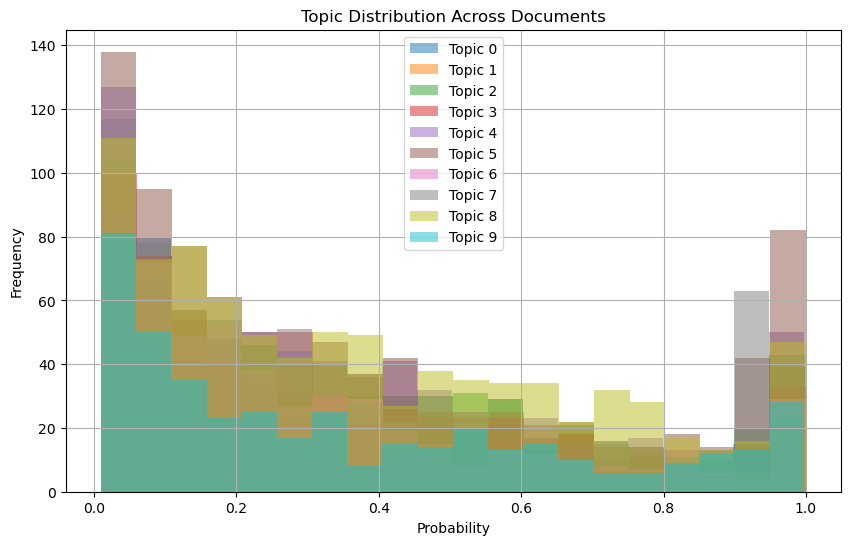

In [8]:
import matplotlib.pyplot as plt

# Get topic distribution for each document
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]

# Initialize an empty list to store topic probabilities for each document
topic_probabilities = [[] for _ in range(num_topics)]

# Populate the topic probabilities list
for doc_topics in topic_distribution:
    for topic, prob in doc_topics:
        topic_probabilities[topic].append(prob)

# Plotting
plt.figure(figsize=(10, 6))
for i, topic_probs in enumerate(topic_probabilities):
    plt.hist(topic_probs, bins=20, alpha=0.5, label='Topic {}'.format(i))

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Topic Distribution Across Documents')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from gensim.models import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score:', coherence_lda)

#Create another topic model (SKlearn , Spacy etc.) - 2 to 3 models 
#Do the evaluation using coherence score , perplexity , visualisation to see overlap of topics to evaluate the best topic model 
#Based on the best model find the dominant topic 

Coherence Score: 0.34900635245306566


In [10]:
# Compute perplexity
perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity Score:', perplexity_score)


Perplexity Score: -8.548981611046901


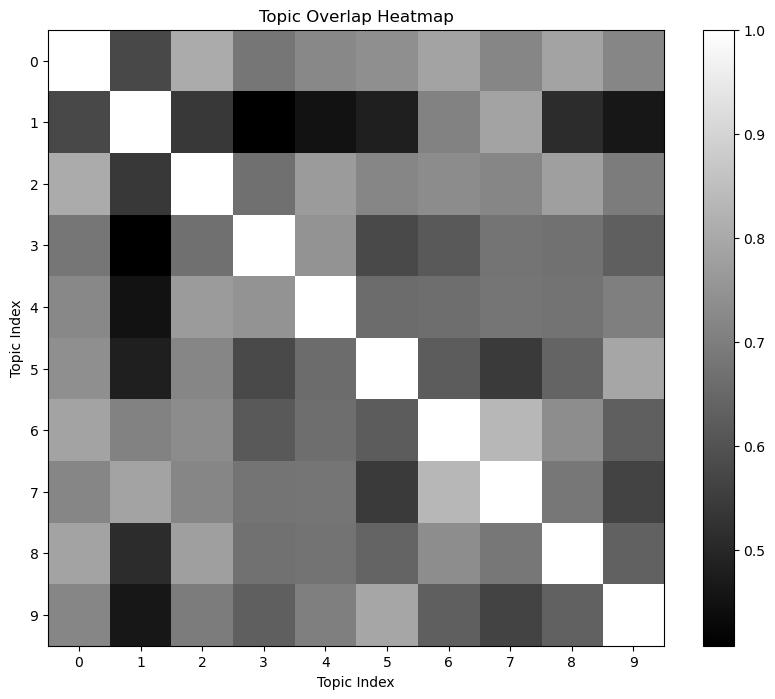

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assuming lda_model is your trained LDA model
# Assuming dictionary is your Gensim dictionary

# Get the topic-term matrix from the LDA model
topic_matrix = lda_model.get_topics()

# Compute pairwise cosine similarity between topics
similarity_matrix = cosine_similarity(topic_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='gray', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set ticks and labels
num_topics = similarity_matrix.shape[0]
plt.xticks(np.arange(num_topics), np.arange(num_topics))
plt.yticks(np.arange(num_topics), np.arange(num_topics))
plt.xlabel('Topic Index')
plt.ylabel('Topic Index')
plt.title('Topic Overlap Heatmap')

plt.show()

#darker the color higher the similarity greater overlap

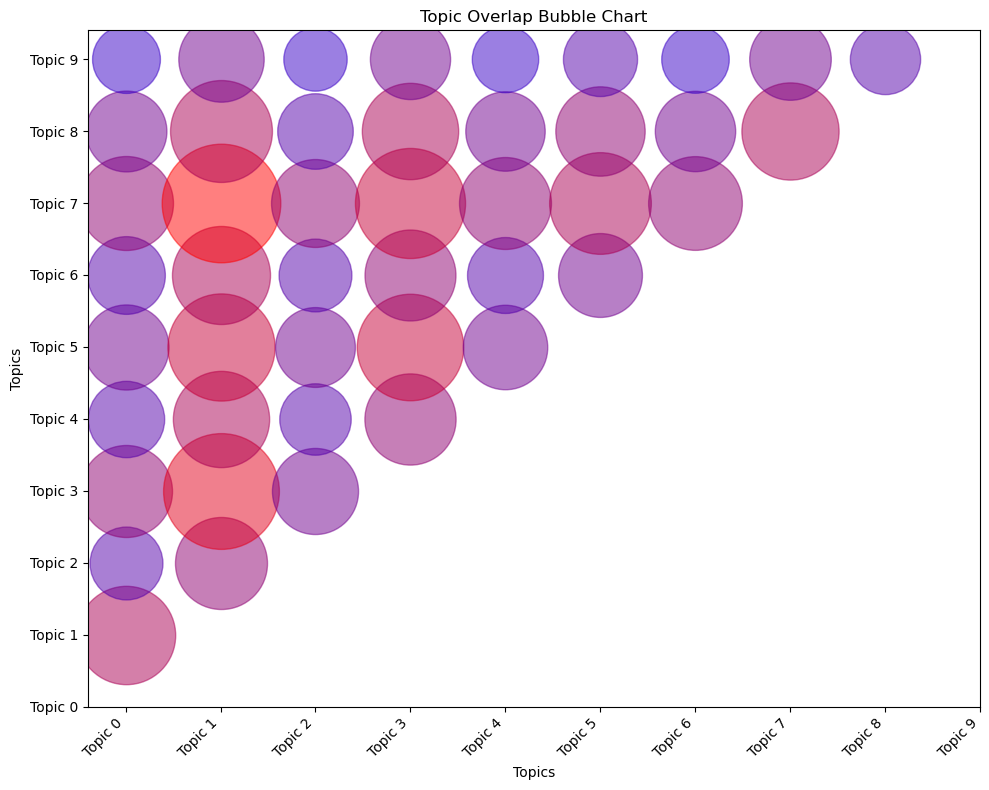

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the topic keywords and their distributions
topics = topics_dict

# Extract topic keywords and distributions
topic_keywords = list(topics.keys())
keyword_distributions = np.array([list(topic.values()) for topic in topics.values()])

# Calculate the overlap matrix
overlap_matrix = np.dot(keyword_distributions, keyword_distributions.T)

# Determine the maximum overlap value
max_overlap = np.max(overlap_matrix)

# Define a custom colormap
colors = [(0, 0, 1), (1, 0, 0)]  # Blue to red
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=10)

# Plot the bubble chart with increased bubble size
plt.figure(figsize=(10, 8))
for i in range(overlap_matrix.shape[0]):
    for j in range(i + 1, overlap_matrix.shape[1]):
        bubble_size = overlap_matrix[i][j] / max_overlap * 8000  # Adjust bubble size relative to the maximum overlap
        color = 'red' if overlap_matrix[i][j] == max_overlap else cmap(overlap_matrix[i][j] / max_overlap)
        plt.scatter(i, j, s=bubble_size, alpha=0.5, label=f'Topic {i}-{j}', color=color)

# Add labels and legend
plt.xticks(range(len(topic_keywords)), topic_keywords, rotation=45, ha='right')
plt.yticks(range(len(topic_keywords)), topic_keywords)
plt.xlabel('Topics')
plt.ylabel('Topics')
plt.title('Topic Overlap Bubble Chart')
#plt.legend(prop={'size': 8})  # Set font size of legend labels

# Show plot
plt.tight_layout()
plt.show()

#Blue to red , hence the redder the color the greater the topic overlap 

In [13]:
# Initialize an empty list to store the most dominant topic for each document
dominant_topics = []

# Iterate through the topic distributions for each document
for doc_topics in topic_distribution:
    # Sort the topic probabilities in descending order
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    # Get the most dominant topic (the one with the highest probability)
    dominant_topic = sorted_topics[0][0]
    dominant_topics.append(dominant_topic)

# Add the dominant topics to the DataFrame
df['dominant_topic'] = dominant_topics

# Print the most dominant topic for each document
for index, row in df.iterrows():
    print("Document {}: Dominant Topic {}".format(index, row['dominant_topic']))


Document 1: Dominant Topic 0
Document 2: Dominant Topic 7
Document 3: Dominant Topic 0
Document 4: Dominant Topic 2
Document 5: Dominant Topic 0
Document 6: Dominant Topic 0
Document 7: Dominant Topic 0
Document 8: Dominant Topic 0
Document 9: Dominant Topic 0
Document 10: Dominant Topic 0
Document 11: Dominant Topic 0
Document 12: Dominant Topic 0
Document 13: Dominant Topic 0
Document 14: Dominant Topic 0
Document 15: Dominant Topic 0
Document 16: Dominant Topic 0
Document 17: Dominant Topic 0
Document 18: Dominant Topic 0
Document 19: Dominant Topic 0
Document 20: Dominant Topic 0
Document 21: Dominant Topic 0
Document 22: Dominant Topic 0
Document 23: Dominant Topic 0
Document 24: Dominant Topic 0
Document 25: Dominant Topic 0
Document 27: Dominant Topic 4
Document 28: Dominant Topic 2
Document 29: Dominant Topic 4
Document 30: Dominant Topic 0
Document 31: Dominant Topic 8
Document 32: Dominant Topic 2
Document 33: Dominant Topic 2
Document 34: Dominant Topic 4
Document 35: Domina

Document 1240: Dominant Topic 4
Document 1241: Dominant Topic 4
Document 1242: Dominant Topic 4
Document 1243: Dominant Topic 4
Document 1244: Dominant Topic 4
Document 1245: Dominant Topic 6
Document 1246: Dominant Topic 4
Document 1247: Dominant Topic 5
Document 1248: Dominant Topic 5
Document 1249: Dominant Topic 4
Document 1250: Dominant Topic 5
Document 1251: Dominant Topic 4
Document 1252: Dominant Topic 7
Document 1253: Dominant Topic 0
Document 1254: Dominant Topic 5
Document 1255: Dominant Topic 4
Document 1256: Dominant Topic 4
Document 1257: Dominant Topic 4
Document 1258: Dominant Topic 6
Document 1259: Dominant Topic 4
Document 1260: Dominant Topic 4
Document 1261: Dominant Topic 7
Document 1262: Dominant Topic 9
Document 1263: Dominant Topic 4
Document 1264: Dominant Topic 4
Document 1265: Dominant Topic 5
Document 1266: Dominant Topic 0
Document 1267: Dominant Topic 5
Document 1268: Dominant Topic 5
Document 1271: Dominant Topic 4
Document 1272: Dominant Topic 7
Document

## Abstractive Summarisation

In [29]:
#!pip3 install torch torchvision torchaudio
#!pip install transformers
#!pip install sentencepiece

  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/8c/49/e37b6cacaef3fefdab3c508ef04f6cbdbfcf5c014a5ba28cb62ab33badd6/torchaudio-2.2.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 660.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.4 MB 1.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.4 MB 3.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.9/2.4 MB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 1.2/2.4 MB 5.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.7/2.4 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  2.4/2.4 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 7.5 MB/s eta 0:00:00


In [2]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

model_name = 'google/pegasus-xsum'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

C:\Users\jositav.2020\AppData\Local\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
for index, row in df.iterrows():
    src_text = row['Body']
    #print("Text in Row {}: {}".format(index, text))
    batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest',return_tensors='pt')
    translated = model.generate(**batch)
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
    print(tgt_text)

C:\Users\jositav.2020\AppData\Local\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:3786: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


['The High Court in London has ruled in favour of a Hong Kong businessman in a case brought against the government of Qatar.']
['A chronology of key events:']
['The High Court of Singapore (the "HC" or the "Court") has issued its decision in the case of Lim Ing Haan Pte Ltd v Tuan \'Abdu Qayyim Bin Tuan Isa.']
['On 4 May 2017, Dr Lim Swee Swee ("Ms Lim") was driving her motor vehicle along Bukit Timah Road in Singapore.']
['The parties reached agreement on three of the heads of damages claimed by Ms Lim, which are: (a) Pain and suffering (part of general damages): $40,000.']
["Mr Tuan's case is that, despite Ms Lim's own medical expert having identified a reduction in her working capacity since she suffered the Injuries, she has since generated a higher total revenue and has not suffered any loss of earnings since the Accident."]
["The following is a summary of some of the key findings from the independent reviews carried out by the UK's universities over the past five years."]
['Here 

['A chronology of key events:']
['All photographs are copyrighted.']
['The Court of Appeal has dismissed an appeal by a group of Singapore-incorporated companies against a permanent injunction granted by the High Court in Singapore against a group of Mexican-incorporated companies.']
['This is an appeal from the decision of the High Court in Mexico City (the "Judge"), in which he dismissed an interlocutory appeal brought by Oro Negro Drilling Pte Ltd and others v Integradora de Servicios Petroleros Oro Negro SAPI de CV and others (the "Respondents"),']
["This is an appeal from the High Court's decision (OS 126) in which it held that the appellant, Mr Gonzalo Gil White, was not a party to the underlying suit in which he was a defendant (OS 126)."]
['Integrodora AS, Integradora AS, Perforadora y Montero y Montero y Montero y Montero, Perforadora y Montero y Montero y Montero, Perforadora y Montero y Montero, and Perforadora y Montero y Montero (collectively, the "first respondent" or the

['Evidence may be corroborative if it supports the account of the accused by a preponderance of the evidence.']
['A chronology of key events:']
["In C v Public Prosecutor, the court will consider whether liberal corroboration of a witness's testimony at trial is permissible."]
['The Court of Justice of the European Union (GCK) requires that the complainant\'s evidence must be "unusually convincing".']
['The prosecution has rested its case.']
["The occasion of C's first disclosure of the sexual abuse to G would have been a significant event to G."]
['Key findings:']
['Key points:']
['CAX was found guilty of two counts of making and distributing indecent images of children - one of which occurred at the Family Home when C was nine years old and in Primary three, and one of which occurred at the Family Home when C was nine years old and in Primary three.']
['In the case of CAX and C, the prosecution case was that they had committed a series of sexual offences against a young girl over a n

['Ho Ching ("Ho"), the former managing director of Frankel Motor, has been found guilty of various cheating offences under s 420 of the 1985 PC.']
['In the first of a series of letters to MPs, the Speaker of the House of Commons, John Bercow, writes:']
['A chronology of key events:']
['The Court of Appeal has upheld the conviction and sentence of Ho and Yeo on the following charges:']
['Ho Chun-yuen has been found not guilty of two counts of conspiracy to commit fraud and one count of money laundering.']
['The appellants have lost their appeal against the decision of the DJ at the Court of Appeal to uphold the convictions of the appellants for perverting the course of justice.']
['The Appellants appeal against the decision of the District Judge (DJ) who found them guilty of cheating banks out of millions of dollars.']
["The DJ's decision in relation to the Double Financing Charges can be summarised as follows:"]
['The decision in relation to the Wirana Charges can be summarised as foll

['A chronology of key events:']
['This originating application is being brought in the High Court of Singapore.']
['On 7 February 2024, I heard the case of Victory Pharmaceutical Holdings Pte Ltd ("Victory"), against Navis Holdings Pte Ltd ("Navis"), against Anthony Borrelli, against CCPL, and against each other.']
['On 5 October 2023, Navis Holdings Limited ("Navis"), a company incorporated in the Republic of Ireland, sold its entire issued and to be issued share capital (the "Victory Shares") in OPV SG, a company incorporated in the Republic of Ireland, to Victory Holdings Pte Ltd ("Victory").']
['Navis Capital Pte Ltd ("Navis" or the "Company"), a wholly-owned subsidiary of Navis Holdings Pte Ltd, has filed a lawsuit in the High Court of Singapore against Victory Shipbuilding Pte Ltd ("Victory" or the "Company"), a wholly-owned subsidiary of Victory, for breach of']
['On 8 June 2021, OPV SG entered into a loan agreement (the " Facility Agreement") with Navis Capital Pte Ltd, a wholl

['All photographs are copyrighted.']
['The High Court has sentenced a woman to two-and-a-half years in jail after she pleaded guilty to two counts of grooming a minor for sexual purposes.']
["2 The Court of Appeal has upheld the conviction and sentence of the applicant for offences under the Corruption, Drug Trafficking and Other Serious Crimes (Confiscation of Benefits) Act (Cap 65A) for having in her possession monies in her DBS bank account, having reasonable grounds to believe that the monies were Mark'"]
['A woman has been jailed for three months for failing to acknowledge receipt of an advisory letter from the police that advised her to refrain from dealing with funds from "unknown and/or dubious sources".']
['The Court of Appeal for the High Court of Hong Kong has rejected an appeal from the conviction of a man for assaulting a police officer.']
['A woman was found guilty of two offences under the Proceeds of Crime Act 1988 ("CDSA"), namely possession and removal of monies.']
['

["In his closing submissions, Mr Mike submitted that Mr Manoj's testimony was not credible because he had not been to the scene of the crime at the time of the alleged offence."]
['A chronology of key events:']
['In Mike\'s case, the plaintiff, Manoj, had not proven his affirmative case on the alleged loan agreement because, as the court in Chan Tam Hoi noted, "the burden of proof always remains on the plaintiff to prove its positive case".']
['Here are the key points of the case:']
['Here is a guide to the key issues in the case between Mike and Manoj.']
["Mike's claim for S$33,000 for wine that he allegedly paid for on Mr Mike's behalf fails."]
['A chronology of key events:']
['In the case of Dept Store Pte Ltd v Manoj Kalwani, here are the key findings of the High Court.']
["138 I dismiss Mr Manoj Khosa's claim for S$1,500,000 for the transfer made to Mr Mike Khosa."]
['All images are copyrighted.']
['All photographs are copyrighted.']
['This is a case of sexual assault and outrage 

['This case concerns the ownership of a diamond ring (the " Jewellery"), which was the subject of an arbitration between the applicants and the respondents.']
["The Arbitrator's findings were on matters that were well within the scope of submission to the Arbitration."]
['This is a challenge to an arbitral award under s 48(1)(aiii) of the Arbitration Act 2005.']
['In Soh Beng Tee, the Court of Appeal held that a breach of the rules of natural justice occurred in connection with the making of an arbitral award.']
["Whether the Arbitrator breached the fair hearing rule 54 The Arbitrator breached the fair hearing rule by failing to apply its mind to the essential issues arising from the parties' arguments."]
['Whether the Arbitrator prejudged and was biased against laboratory-grown gemstones 85 The applicant made several allegations against the Arbitrator in support of his submission that the Arbitrator had "sealed her mind" from the applicant\'s evidence.']
['The High Court of Singapore 

KeyboardInterrupt: 